In [4]:
import numpy as np
import matplotlib.pyplot as plt

In [5]:
plt.rcParams['font.family'] = 'DeJavu Serif'
plt.rcParams['font.serif'] = ['Times New Roman']

In [6]:
ratio = [0.2]

# for fmnist
seed = [12]

# for mnist
#seed = [12]

noniid = 0.4
where='fmnist'
where_origin='fmnist_origin'
epoch = 20

last_round = [[] for i in range(len(seed))]
group = [[] for i in range(len(seed))]

for s in range(len(seed)):
    for r in ratio:
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/round.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(len(lines)-1,len(lines)):
                save_round = eval(lines[line].split(" ")[-1])
                
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/num.txt'
        with open(path) as f:
            lines = f.readlines()
            for line in range(save_round*10,save_round*10+10):
                last_round[s].append(lines[line])
        
        path = '/mnt/d/My_FL/My_FL/src/' + where + '/seed_' + str(seed[s]) + '/' + '/noniid_' + str(noniid) + '/ratio_' + str(r) + '/client.txt'
        with open(path) as f:
            lines = f.readlines()
            group[s].append(lines[len(lines)-3])
            group[s].append(lines[len(lines)-2])
            group[s].append(lines[len(lines)-1])
        
    for i in range(len(last_round[0])):
        last_round[s][i] = last_round[s][i].split(" ")[1]
        last_round[s][i] = int(last_round[s][i].split("/")[0])

    for i in range(len(group[0])):
        group[s][i] = group[s][i].split(":")[1]
        group[s][i] = eval(group[s][i])

In [7]:
rec_order_good = [[] for i in range(len(seed))]
rec_order_normal = [[] for i in range(len(seed))]
rec_order_bad = [[] for i in range(len(seed))]

for s in range(len(seed)):
    for g in group[s][0]:
        rec_order_good[s].append(last_round[s][g])
    rec_order_good[s].sort()
    for g in group[s][1]:
        rec_order_normal[s].append(last_round[s][g])
    rec_order_normal[s].sort()
    for g in group[s][2]:
        rec_order_bad[s].append(last_round[s][g])
    rec_order_bad[s].sort()


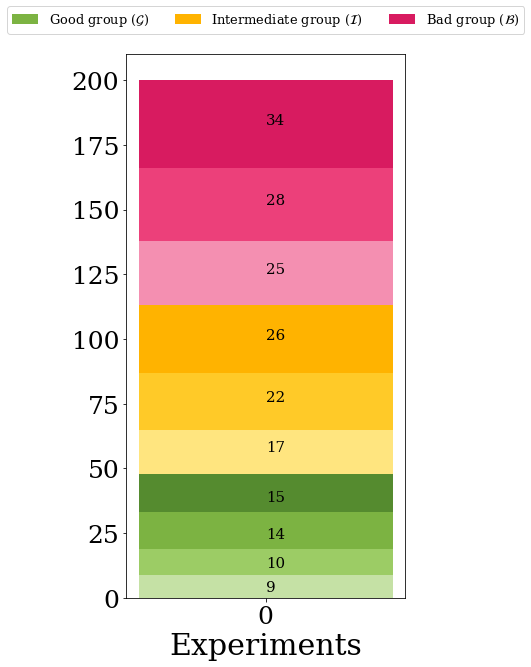

In [13]:
fig, ax = plt.subplots(figsize=(5,10))

x = [i for i in range(len(seed))]
acc = np.array([0 for i in range(len(seed))])

good_color = ['#C5E1A5','#9CCC65','#7CB342','#558B2F','#AED581','#8BC34A','#689F38','#33691E','#A5D6A7']
normal_color = ['#FFE57F','#FFCA28','#FFB300','#FF8F00','#FFCA28','#FFC107','#FFA000','#FF6F00','#FFF59D']
bad_color = ['#F48FB1','#EC407A','#D81B60','#AD1457','#F06292','#E91E63','#C2185B','#880E4F','#ef9a9a']
#ax.set_yticks([0,4,8,12,16,20])
ax.set_xticks(x)

ax.set_xlabel("Experiments",fontsize=30)
#ax.set_ylabel("Malicious clients",fontsize=30)
ax.tick_params(labelsize=25)

y = [0 for i in range(len(seed))]
ax.bar(x,y,color=good_color[2],label='Good group ' + r'($\mathcal{G}$)')
ax.bar(x,y,color=normal_color[2],label='Intermediate group ' + r'($\mathcal{I}$)')
ax.bar(x,y,color=bad_color[2],label='Bad group ' + r'($\mathcal{B}$)')

ax.legend(loc='upper center',bbox_to_anchor =(0.5, 1.1),ncol=3,fontsize=13)

for i in range(len(seed)):
    for k in range(len(rec_order_good[i])):
        y = [0 for i in range(len(seed))]
        y[i] = rec_order_good[i][k]
        ax.bar(x,y,bottom=acc,color=good_color[k])
        acc[i] += rec_order_good[i][k]
        if(y[i]!=0 and ratio[0]>=0.1):
            if(y[i]>9):
                ax.text(x[i],acc[i]-y[i]/2*1.4,str(y[i]),fontsize=15)
            else:
                ax.text(x[i],acc[i]-y[i]/2*1.4,str(y[i]),fontsize=15)
        elif(y[i]!=0):
            if(y[i]>9):
                ax.text(x[i],acc[i]-y[i]/2*1.4,str(y[i]),fontsize=15)
            else:
                ax.text(x[i],acc[i]-y[i]/2*1.4,str(y[i]),fontsize=15)
        
    for k in range(len(rec_order_normal[i])):
        y = [0 for i in range(len(seed))]
        y[i] = rec_order_normal[i][k]
        ax.bar(x,y,bottom=acc,color=normal_color[k])
        acc[i] += rec_order_normal[i][k]
        if(y[i]!=0 and ratio[0]>=0.1):
            if(y[i]>9):
                ax.text(x[i],acc[i]-y[i]/2,str(y[i]),fontsize=15)
            else:
                ax.text(x[i],acc[i]-y[i]/2,str(y[i]),fontsize=15)
        elif(y[i]!=0):
            if(y[i]>9):
                ax.text(x[i],acc[i]-y[i]/2,str(y[i]),fontsize=15)
            else:
                ax.text(x[i],acc[i]-y[i]/2,str(y[i]),fontsize=15)
                
    for k in range(len(rec_order_bad[i])):    
        y = [0 for i in range(len(seed))]
        y[i] = rec_order_bad[i][k]
        ax.bar(x,y,bottom=acc,color=bad_color[k])
        acc[i] += rec_order_bad[i][k]
        if(y[i]!=0 and ratio[0]>=0.1):
            if(y[i]>9):
                ax.text(x[i],acc[i]-y[i]/2,str(y[i]),fontsize=15)
            else:
                ax.text(x[i],acc[i]-y[i]/2,str(y[i]),fontsize=15)
        elif(y[i]!=0):
            if(y[i]>9):
                ax.text(x[i],acc[i]-y[i]/2,str(y[i]),fontsize=15)
            else:
                ax.text(x[i],acc[i]-y[i]/2,str(y[i]),fontsize=15)